<a href="https://colab.research.google.com/github/AjAyrAo43/project/blob/main/DOG_VS_CAT_IMAGE_CLASSIFIER_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

tongpython_cat_and_dog_path = kagglehub.dataset_download('tongpython/cat-and-dog')


print('Data source import complete.')


100%|██████████| 218M/218M [00:11<00:00, 20.2MB/s]

Extracting files...


Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.3244.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.2373.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.3261.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.614.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.3692.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.1490.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.1805.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.1449.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.3278.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.3748.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.2580.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.2586.jpg
/kaggle/input/cat-and-dog/training_set/training_set/dogs/dog.1996.jpg
/kaggle/input/cat-and-dog/training_set/t

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense ,Conv2D,Flatten,MaxPooling2D,BatchNormalization , Dropout

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/cat-and-dog/training_set/training_set',
    labels='inferred',
    label_mode='int',
    image_size=(128, 128),
    batch_size=32,
    validation_split=0.2,
    subset='training',
    seed=123
)
val_data = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/cat-and-dog/test_set/test_set',
    labels='inferred',
    label_mode='int',
    image_size=(128, 128),
    batch_size=32,
    validation_split=0.2,
    subset='validation',
    seed=123
)

Found 8005 files belonging to 2 classes.
Using 6404 files for training.
Found 2023 files belonging to 2 classes.
Using 404 files for validation.


In [ ]:
#Normalize

def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_data = train_data.map(process)
val_data = val_data.map(process)

In [ ]:
# create cnn model

model = Sequential()

model.add(Conv2D(32,kernel_size =(3,3),padding='valid',activation='relu',input_shape =(128,128,3) ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size =(3,3),padding='valid',activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size =(3,3),padding='valid',activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(256,kernel_size =(3,3),padding='valid',activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,313,857 (12.64 MB)

 Trainable params: 3,313,409 (12.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_data,epochs=10,validation_data=val_data)
history

Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 19s 64ms/step - accuracy: 0.5674 - loss: 1.4708 - val_accuracy: 0.5371 - val_loss: 0.7443
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.6182 - loss: 0.6934 - val_accuracy: 0.5495 - val_loss: 0.7447
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.6493 - loss: 0.6466 - val_accuracy: 0.5545 - val_loss: 0.7272
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.6991 - loss: 0.5723 - val_accuracy: 0.5693 - val_loss: 1.1271
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7394 - loss: 0.5315 - val_accuracy: 0.5916 - val_loss: 0.6649
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - accuracy: 0.7806 - loss: 0.4503 - val_accuracy: 0.6807 - val_loss: 0.7015
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.8332 - loss: 0.3689 - val_accuracy: 0.7748 - val_loss: 0.5087
Epoch 8/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - accuracy: 0.8541 - loss: 0.3278 - val_acc

In [ ]:
import cv2

In [ ]:
test_img=cv2.imread('/content/pexels-hnoody93-58997.jpg')

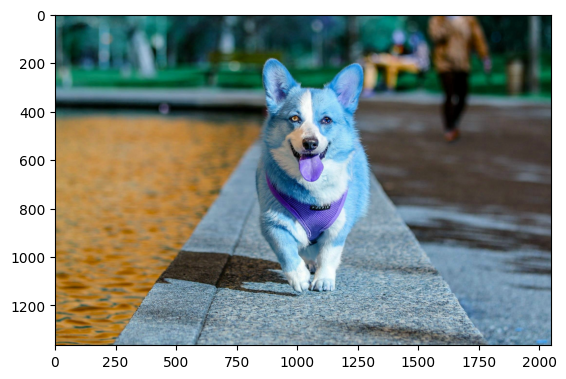

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(test_img)

In [ ]:
test_img=cv2.resize(test_img,(128,128))

In [ ]:

test_input=test_img.reshape((1,128,128,3))

In [ ]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 684ms/step


array([[1.]], dtype=float32)

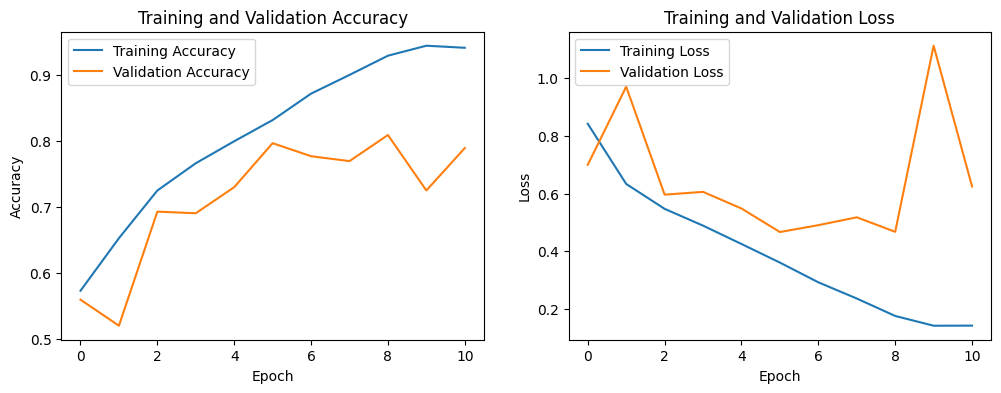

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
from keras.callbacks import EarlyStopping

# Add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(train_data, epochs=50, validation_data=val_data, callbacks=[early_stopping])

Epoch 1/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 23s 75ms/step - accuracy: 0.5437 - loss: 1.0202 - val_accuracy: 0.5594 - val_loss: 0.6998
Epoch 2/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.6207 - loss: 0.6735 - val_accuracy: 0.5198 - val_loss: 0.9709
Epoch 3/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.7059 - loss: 0.5786 - val_accuracy: 0.6931 - val_loss: 0.5960
Epoch 4/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.7580 - loss: 0.5122 - val_accuracy: 0.6906 - val_loss: 0.6056
Epoch 5/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.7812 - loss: 0.4533 - val_accuracy: 0.7302 - val_loss: 0.5480
Epoch 6/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.8206 - loss: 0.3773 - val_accuracy: 0.7970 - val_loss: 0.4662
Epoch 7/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.8653 - loss: 0.3103 - val_accuracy: 0.7772 - val_loss: 0.4900
Epoch 8/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.8895 - loss: 0.2510 - val_acc

In [95]:
from google.colab import files
uploaded = files.upload()  # Upload the kaggle.json you just downloaded

import os
import shutil

# Print the files in the current directory to check the uploaded file name
print("Files in current directory:", os.listdir())

# Make a kaggle folder and move kaggle.json there
os.makedirs('/root/.kaggle', exist_ok=True)
# shutil.move('kaggle.json', '/root/.kaggle/kaggle.json')

# Set permissions
# os.chmod('/root/.kaggle/kaggle.json', 0o600)

Saving kaggle (6).json to kaggle (6) (1).json
Files in current directory: ['.config', 'kaggle (6) (1).json', 'premium_photo-1666777247416-ee7a95235559.jpeg', 'pexels-pixabay-45201.jpg', 'pexels-hnoody93-58997.jpg', 'kaggle (6).json', 'sample_data']
